resource from: https://www.kaggle.com/mohammedomda/applying-svm-on-e-commerce-clothing-reviews

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
data.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

Dropout Unwanted Features (Would not make sense at all)

In [7]:
data.drop(['Unnamed: 0','Clothing ID'], axis=1, inplace=True)

Rename the columns names and make them more pythnic

In [8]:
data.rename(columns={'Review Text': 'text',
                    'Positive Feedback Count': 'feedback_count',
                    'Division Name': 'Division', 'Department Name': 'Department',
                    'Class Name':'Class', 'Recommended IND': 'Recommended'},inplace=True)

New columns names

In [9]:
print(data.columns)

Index(['Age', 'Title', 'text', 'Rating', 'Recommended', 'feedback_count',
       'Division', 'Department', 'Class'],
      dtype='object')


Look into the missing values at each column index

In [10]:
data.isnull().sum()

Age                  0
Title             3810
text               845
Rating               0
Recommended          0
feedback_count       0
Division            14
Department          14
Class               14
dtype: int64

removing out every row in the df which contains missing data

In [11]:
data.dropna(axis=0, inplace=True)

In [12]:
data.isnull().sum()

Age               0
Title             0
text              0
Rating            0
Recommended       0
feedback_count    0
Division          0
Department        0
Class             0
dtype: int64

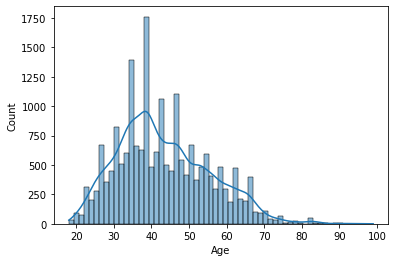

In [13]:
sns.histplot(data=data, x='Age', kde=True)
plt.show()

note: 40 years old ladies are the main customers

<AxesSubplot:xlabel='Rating', ylabel='Count'>

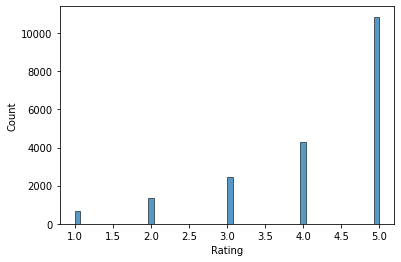

In [14]:
sns.histplot(data=data, x='Rating', kde=False)

the majority of site visitors are more likely to give 5 rates for each products

<AxesSubplot:xlabel='Rating', ylabel='Class'>

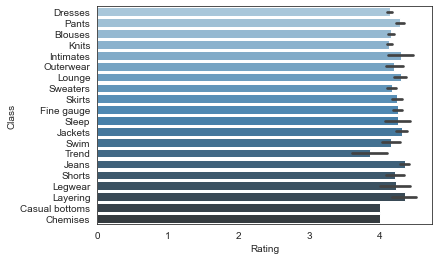

In [15]:
sns.set_style('white')
sns.barplot(x=data['Rating'], y=data['Class'],palette="Blues_d")

Layering class👗 on the top of whole ratings comparing to other classes!

<AxesSubplot:xlabel='Age', ylabel='Class'>

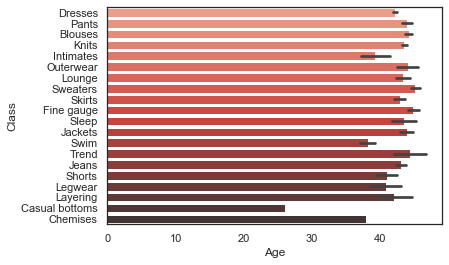

In [16]:
sns.set_theme(style="white")
sns.color_palette("flare", as_cmap=False)
sns.barplot(x=data['Age'], y=data['Class'],palette="Reds_d")

Sweaters are more preferable for those whom are above 40's where Casual bottoms attrcats 20's as this barplot shows below!

Plot shows the distribution of positive ratings:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


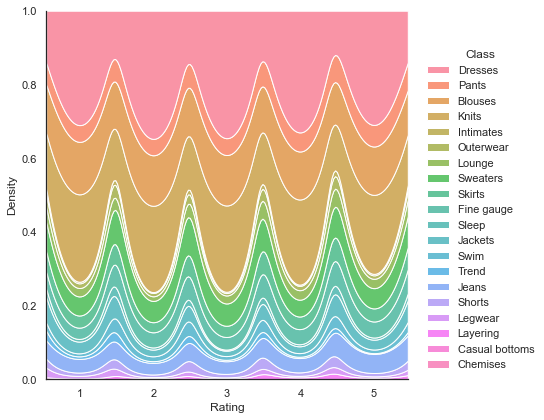

In [18]:
sns.displot(data=data,
    x='Rating', hue="Class",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
)

This boxplot below determine the mean age according to each department:

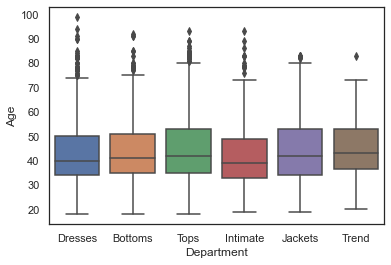

In [19]:
sns.boxplot(x=data['Department'], y=data['Age'])
plt.show()

Piechart visualize that the Tops department has gotten the most amounts of ratings, where Trends got the low amount of ratings:

<AxesSubplot:ylabel='Rating'>

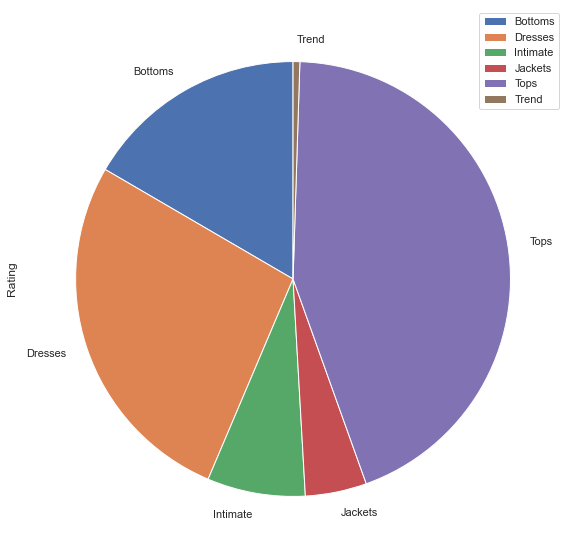

In [20]:
data.groupby(['Department']).sum().plot(kind='pie', subplots=False, shadow = False,startangle=90,figsize=(15,10), y='Rating')

Which one is highly Recommended??🌟

<AxesSubplot:xlabel='count', ylabel='Class'>

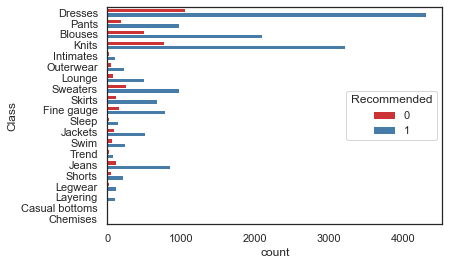

In [22]:
sns.countplot(data=data, y='Class', hue='Recommended',  palette = "Set1")

<AxesSubplot:xlabel='count', ylabel='Department'>

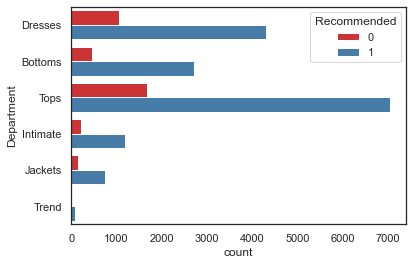

In [23]:
sns.countplot(data=data, y='Department', hue='Recommended' ,palette = "Set1")

<AxesSubplot:xlabel='count', ylabel='Division'>

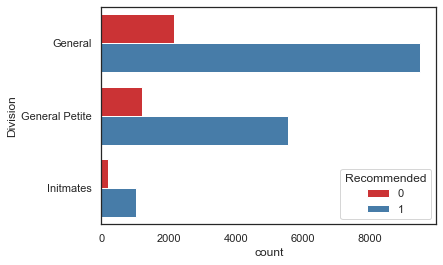

In [24]:
sns.countplot(data=data, y='Division', hue='Recommended', palette = "Set1")

## Working With Textual Data 📝📝

In [25]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

In [26]:
data.columns

Index(['Age', 'Title', 'text', 'Rating', 'Recommended', 'feedback_count',
       'Division', 'Department', 'Class'],
      dtype='object')

In [27]:
data['all_text'] = data['text']

### Step 1: Tokenization

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/defryhamdhana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
def tokenize(column):
    # Tokenize a Pandas dataframe columns and returns a list of tokens.
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha]

In [31]:
data['tokenized'] = data.apply(lambda x: tokenize(x['all_text']), axis=1)
data[['text', 'tokenized']].head()

,text,tokenized
2,I had such high hopes for this dress and reall...,"[I, had, such, high, hopes, for, this, dress, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[I, love, ,, love, ,, love, this, jumpsuit, .,..."
4,This shirt is very flattering to all due to th...,"[This, shirt, is, very, flattering, to, all, d..."
5,"I love tracy reese dresses, but this one is no...","[I, love, tracy, reese, dresses, ,, but, this,..."
6,I aded this in my basket at hte last mintue to...,"[I, aded, this, in, my, basket, at, hte, last,..."


### Step 2: Removing stopwords

In [32]:
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/defryhamdhana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
def remove_stopwords(tokenized_column):
    # this fuction will retun a list of tokens with English stopwords removed
    stops = set(stopwords.words('english'))
    return [word for word in tokenized_column if not word in stops]

In [34]:
data['stopwords_removed'] = data.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
data[['text', 'stopwords_removed']].head()

,text,stopwords_removed
2,I had such high hopes for this dress and reall...,"[I, high, hopes, dress, really, wanted, work, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[I, love, ,, love, ,, love, jumpsuit, ., 's, f..."
4,This shirt is very flattering to all due to th...,"[This, shirt, flattering, due, adjustable, fro..."
5,"I love tracy reese dresses, but this one is no...","[I, love, tracy, reese, dresses, ,, one, petit..."
6,I aded this in my basket at hte last mintue to...,"[I, aded, basket, hte, last, mintue, see, woul..."


### Step 3: Stemming

In [35]:
def apply_stemming(tokenized_column):
    # this function will return a list of tokens with PorterStemming applied
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokenized_column]

In [36]:
data['porter_stemmed'] = data.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
data[['text', 'porter_stemmed']].head()

,text,porter_stemmed
2,I had such high hopes for this dress and reall...,"[i, high, hope, dress, realli, want, work, ., ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[i, love, ,, love, ,, love, jumpsuit, ., 's, f..."
4,This shirt is very flattering to all due to th...,"[thi, shirt, flatter, due, adjust, front, tie,..."
5,"I love tracy reese dresses, but this one is no...","[i, love, traci, rees, dress, ,, one, petit, ...."
6,I aded this in my basket at hte last mintue to...,"[i, ade, basket, hte, last, mintu, see, would,..."


### Step 4: Rejoin words

In [37]:
def rejoin_words(tokenized_column):
    # this fuction will rejoin the tokenized words list into a single string
    return (" ".join(tokenized_column))

In [38]:
data['rejoined'] = data.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
data[['text', 'rejoined']].head()

,text,rejoined
2,I had such high hopes for this dress and reall...,i high hope dress realli want work . initi ord...
3,"I love, love, love this jumpsuit. it's fun, fl...","i love , love , love jumpsuit . 's fun , flirt..."
4,This shirt is very flattering to all due to th...,thi shirt flatter due adjust front tie . perfe...
5,"I love tracy reese dresses, but this one is no...","i love traci rees dress , one petit . 5 feet t..."
6,I aded this in my basket at hte last mintue to...,i ade basket hte last mintu see would look lik...


In [39]:
from sklearn.model_selection import train_test_split
# spliting the data into trainng and testing data:- 
X_train, X_test, y_train, y_test = train_test_split(data['rejoined'],
                                                   data['Recommended'], test_size=0.3,random_state=0)

In [40]:
print('X_train first entry :\n\n', X_train.iloc[1])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry :

 the shirt beauti , fit much small . stitch limit space shoulder , hem short . petit frame would abl pull off- 5.10 '' medium , shirt n't work everi direct .


X_train shape:  (13763,)


### CountVectorizer:

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
# fit the countVectorizer to the training data:-
vect = CountVectorizer().fit(X_train)

In [42]:
vect.get_feature_names()[::1000]

['00', 'bear', 'cosi', 'fee', 'insert', 'multicolor', 'purc', 'snow', 'um']

In [43]:
len(vect.get_feature_names())

8699